# Oasis Infobyte Internship 

## Name : Virendra Singh

## Task 1 : Iris Flower Classification

### Problem Statement

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Data Gathering

In [3]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Data Exploration

In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.axes

[RangeIndex(start=0, stop=150, step=1),
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object')]

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
print("unique number of species in iris dataset is : ",df["Species"].nunique())

unique number of species in iris dataset is :  3


In [11]:
print("unique species in iris dataset are : ",df["Species"].unique())

unique species in iris dataset are :  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [12]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

> No Null values detected

### Exploratory Data Analysis

#### Data Visualization

<Axes: xlabel='Species', ylabel='count'>

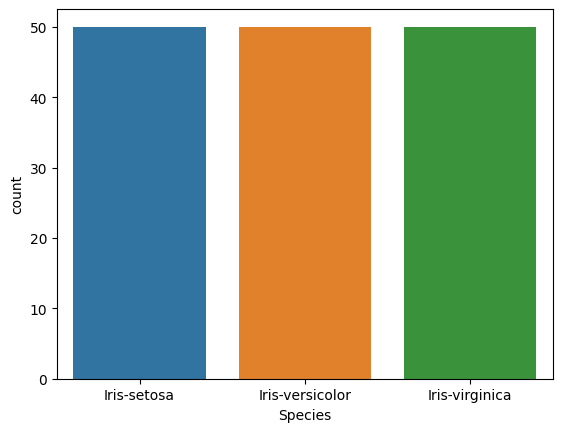

In [13]:
sns.countplot(x=df["Species"])

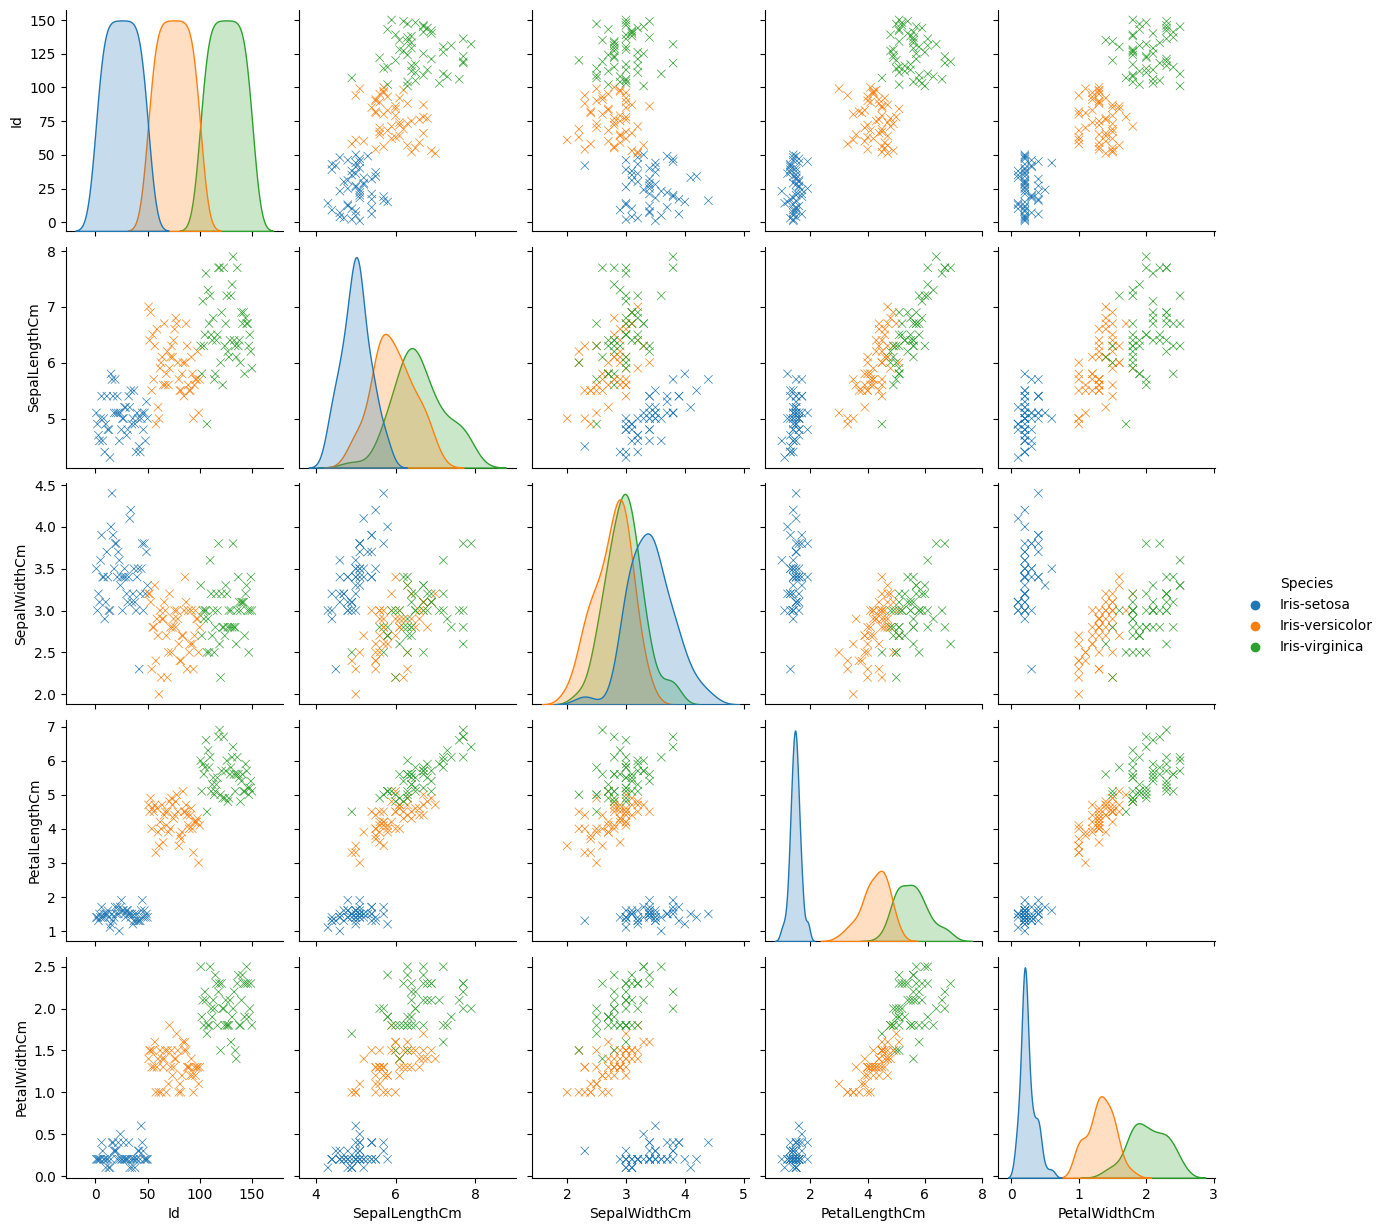

In [14]:
sns.pairplot(df,hue='Species',markers='x')
plt.show()

>This shows that Iris-setosa is separated from Iris-versicolor and Iris-virginica

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<Axes: >

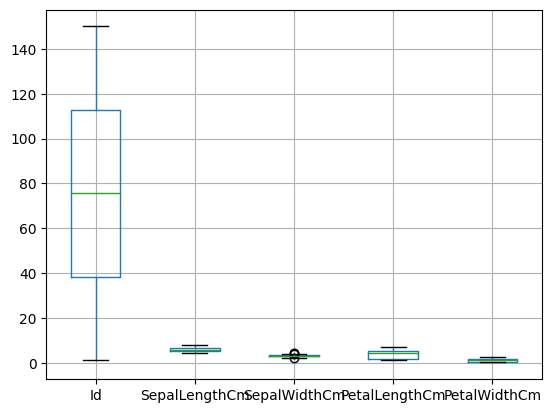

In [16]:
df.boxplot()

<Axes: >

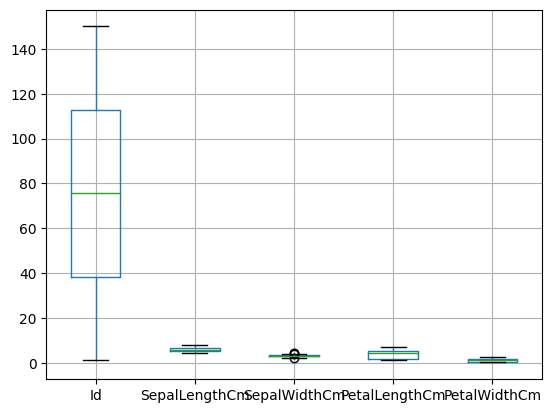

In [17]:
df.boxplot()

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

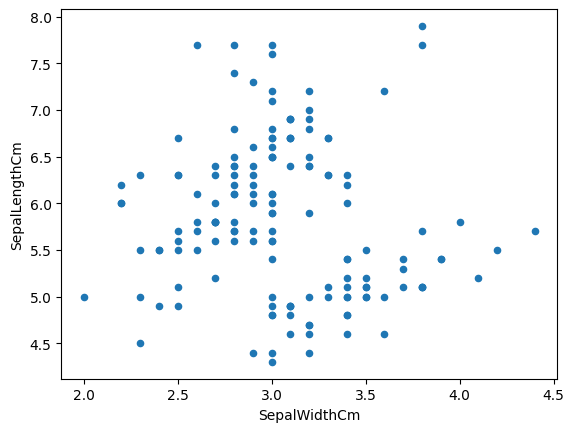

In [18]:
df.plot(x = 'SepalWidthCm',y = 'SepalLengthCm', kind = 'scatter')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

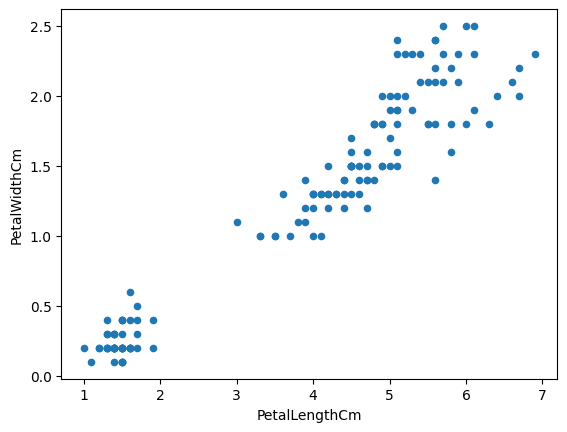

In [19]:
df.plot(x = 'PetalLengthCm',y = 'PetalWidthCm', kind = 'scatter')

In [23]:
df.drop("Id",axis=1,inplace=True)

### Splitting Dataset 

In [24]:
x=df.drop("Species",axis=1)
y=df["Species"]

In [25]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

### Model Training/Building

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3,stratify=y)

In [28]:
print('Shape of x_train is : ', x_train.shape)
print('Shape of x_test is : ',  x_test.shape)
print('Shape of y_train is : ', y_train.shape)
print('Shape of y_test is : ',  y_test.shape)

Shape of x_train is :  (105, 4)
Shape of x_test is :  (45, 4)
Shape of y_train is :  (105,)
Shape of y_test is :  (45,)


### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression()
model

LogisticRegression()

In [31]:
# Fit the model to your training data
model.fit(x_train, y_train)

# Now you can make predictions on the test data
predictions = model.predict(x_test)


In [32]:
y_pred=model.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [33]:
y_test[5:10]

135     Iris-virginica
8          Iris-setosa
68     Iris-versicolor
134     Iris-virginica
86     Iris-versicolor
Name: Species, dtype: object

In [34]:
y_pred[5:10]

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [36]:
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 14]], dtype=int64)

In [37]:
clf_report=classification_report(y_test,y_pred)
print(clf_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.88      0.93      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



In [38]:
# Traing Data Evaluation
y_pred_train=model.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred_train)
print(cnf_matrix)
print()
print()

acc_score=accuracy_score(y_train,y_pred_train)
print('Accuracy Score is : ',acc_score)
print()
print() 


clf_report=classification_report(y_train,y_pred_train)
print(clf_report)

[[35  0  0]
 [ 0 34  1]
 [ 0  1 34]]


Accuracy Score is :  0.9809523809523809


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       0.97      0.97      0.97        35
 Iris-virginica       0.97      0.97      0.97        35

       accuracy                           0.98       105
      macro avg       0.98      0.98      0.98       105
   weighted avg       0.98      0.98      0.98       105



In [39]:
# Testing Data Evaluation
y_pred=model.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print(cnf_matrix)
print()
print()

acc_score=accuracy_score(y_test,y_pred)
print('Accuracy Score is : ',acc_score)
print()
print() 

clf_report=classification_report(y_test,y_pred)
print(clf_report)

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]


Accuracy Score is :  0.9333333333333333


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.88      0.93      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



In [40]:
model.score(x,y)

0.9666666666666667

In [42]:
acc_score*100

93.33333333333333

Hence, The Accuracy achieved is 93%